In [51]:
from PIL import Image
import cv2
import numpy as np
import os

In [52]:
def imshow(image):
    windows = 'image'
    cv2.imshow(windows, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [53]:
import zipfile
path = 'D:/Computer Vision Masterclass/repo/Datasets/yalefaces.zip'
zip_object = zipfile.ZipFile(file = path, mode ='r')
zip_object.extractall('./')
zip_object.close()

## Preprocessing the image

In [54]:
def get_image_data():
    paths = [os.path.join('D:/Computer Vision Masterclass/Face recognition/yalefaces/train', f) for f in os.listdir('D:/Computer Vision Masterclass/Face recognition/yalefaces/train')]
    #print(paths)
    faces = []
    ids = []
    for path in paths:
        #print(path)
        image = Image.open(path).convert('L')
        image_np =np.array(image, 'uint8')
        #print(type(image_np))
        id = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
        #print(id)
        ids.append(id)
        faces.append(image_np)
    return np.array(ids), faces

In [55]:
ids, faces = get_image_data()

In [56]:
ids

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15])

In [57]:
faces[0].shape

(243, 320)

## Training the LBPH 

In [58]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create(radius=3, neighbors = 12, grid_x=9 , grid_y=9)
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

# Recognising faces

In [59]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('D:/Computer Vision Masterclass/Face recognition/lbph_classifier.yml')

In [60]:
test_image = 'D:/Computer Vision Masterclass/Face recognition/yalefaces/test/subject10.sad.gif'
test_image

'D:/Computer Vision Masterclass/Face recognition/yalefaces/test/subject10.sad.gif'

In [61]:
image = Image.open(test_image).convert('L')
image_np = np.array(image, 'uint8')

In [62]:
prediction =  lbph_face_classifier.predict(image_np)
prediction

(10, 27.619284922353426)

In [63]:
expected_output = int(os.path.split(test_image)[1].split('.')[0].replace('subject', ''))
expected_output

10

In [64]:
imshow(image_np)

In [65]:
cv2.putText(image_np, 'Pred : ' + str(prediction[0]),(10, 30), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 255))
cv2.putText(image_np, 'Exp : ' + str(expected_output),(10, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 255))
imshow(image_np)


## Evaluating the face classifier

In [66]:
paths = [os.path.join('D:/Computer Vision Masterclass/Face recognition/yalefaces/test', f) for f in os.listdir('D:/Computer Vision Masterclass/Face recognition/yalefaces/test')]
predictions = []
expected_outputs = []
for path in paths:
    image = Image.open(path).convert('L')
    image_np = np.array(image, 'uint8')
    prediction, _ = lbph_face_classifier.predict(image_np)
    expected_output = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))

    predictions.append(prediction)
    expected_outputs.append(expected_output)

In [67]:
predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)

In [68]:
predictions

array([ 4,  1,  4, 12,  3,  9,  9,  4,  5,  5,  6, 14,  7,  9,  8,  3,  7,
        9,  4, 10, 11, 11, 12, 12, 13, 13, 14, 14,  7, 15])

In [69]:
expected_outputs

array([ 1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,
        9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15])

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(expected_outputs, predictions)

0.6333333333333333

In [71]:
from sklearn.metrics import  confusion_matrix

cm=confusion_matrix(expected_outputs, predictions)

<Axes: >

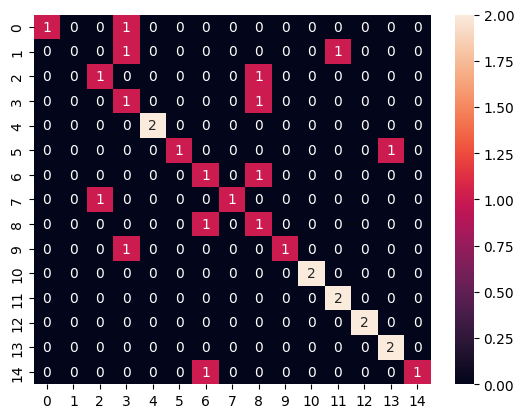

In [72]:
import seaborn
seaborn.heatmap(cm , annot=True)

## DLib

In [73]:
import dlib

## Detecting Facial points

In [74]:
face_detector = dlib.get_frontal_face_detector()
points_detetctor = dlib.shape_predictor('D:/Computer Vision Masterclass/repo/Weights/shape_predictor_68_face_landmarks.dat')

In [75]:
image = cv2.imread('D:/Computer Vision Masterclass/repo/Images/people2.jpg')
face_detection = face_detector(image, 1)
for face in face_detection:
    points = points_detetctor(image, face)
    for point in points.parts():
        cv2.circle(image, (point.x, point.y), 2 ,(0,255,0), 1)
    #print(points.parts())
    #print(len(points.parts()))
    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(image, (l,t), (r,b), (0,255,0), 2)
imshow(image)

## Detecting Facial Descriptors

In [76]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor('D:/Computer Vision Masterclass/repo/Weights/shape_predictor_68_face_landmarks.dat')
face_description_extractor = dlib.face_recognition_model_v1('D:/Computer Vision Masterclass/repo/Weights/dlib_face_recognition_resnet_model_v1.dat')

In [77]:
index = {}
idx = 0
face_descriptors = None

paths = [os.path.join('D:/Computer Vision Masterclass/Face recognition/yalefaces/train', f) for f in os.listdir('D:/Computer Vision Masterclass/Face recognition/yalefaces/train')]
for path in paths:
    image = Image.open(path).convert('RGB')
    image_np = np.array(image, 'uint8')
    face_detection = face_detector(image_np, 1)
    for face in face_detection:
        l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
        cv2.rectangle(image_np, (l, t), (r, b), (0,255,0), 2) 
        points = points_detector(image_np, face)
        for point in points.parts():
            cv2.circle(image_np, (point.x, point.y), 2, (0, 255, 0), 1)
        face_descriptor = face_description_extractor.compute_face_descriptor(image_np, points)
        #print(face_descriptor)
        face_descriptor = [f for f in face_descriptor]
        #print(face_descriptor)
        face_descriptor = np.asarray(face_descriptor, dtype = np.float64)
        #print(face_descriptor)
        #print(face_descriptors.shape)
        face_descriptor = face_descriptor[np.newaxis, :]
        #print(face_descriptor)

        if face_descriptors is None:
            face_descriptors = face_descriptor
        else:
            face_descriptors = np.concatenate((face_descriptors, face_descriptor), axis = 0)
        index[idx] = path
        idx += 1

    imshow(image_np)


In [78]:
index

{0: 'D:/Computer Vision Masterclass/Face recognition/yalefaces/train\\subject01.glasses.gif',
 1: 'D:/Computer Vision Masterclass/Face recognition/yalefaces/train\\subject01.leftlight.gif',
 2: 'D:/Computer Vision Masterclass/Face recognition/yalefaces/train\\subject01.noglasses.gif',
 3: 'D:/Computer Vision Masterclass/Face recognition/yalefaces/train\\subject01.normal.gif',
 4: 'D:/Computer Vision Masterclass/Face recognition/yalefaces/train\\subject01.sad.gif',
 5: 'D:/Computer Vision Masterclass/Face recognition/yalefaces/train\\subject01.sleepy.gif',
 6: 'D:/Computer Vision Masterclass/Face recognition/yalefaces/train\\subject01.surprised.gif',
 7: 'D:/Computer Vision Masterclass/Face recognition/yalefaces/train\\subject01.wink.gif',
 8: 'D:/Computer Vision Masterclass/Face recognition/yalefaces/train\\subject02.glasses.gif',
 9: 'D:/Computer Vision Masterclass/Face recognition/yalefaces/train\\subject02.happy.gif',
 10: 'D:/Computer Vision Masterclass/Face recognition/yalefaces/t

## Calculating Distance between Faces

In [79]:
face_descriptors[131]

array([-0.13089484,  0.06601417, -0.02609954,  0.01518748, -0.08285977,
       -0.00807517, -0.01644151, -0.09620234,  0.06063025, -0.08298973,
        0.11774596, -0.12843287, -0.32784295, -0.07286331, -0.01964053,
        0.12144506, -0.07245643, -0.11688149, -0.14968576, -0.10792908,
        0.04402579,  0.02399734,  0.01140992, -0.01579552, -0.14033128,
       -0.31560978, -0.04343859, -0.06159711, -0.02527868, -0.07731017,
       -0.04519707,  0.04061317, -0.28199843, -0.11886621, -0.00677378,
        0.02211459, -0.01191676, -0.01376762,  0.17890418,  0.02891739,
       -0.13527845,  0.02868937,  0.10408973,  0.23670512,  0.17303771,
        0.09127481, -0.07478257, -0.02238322,  0.10350744, -0.34444627,
        0.0748964 ,  0.12572886,  0.07621396,  0.03156224,  0.11269987,
       -0.06755865, -0.01281096,  0.09152316, -0.15773673,  0.09498625,
        0.09039833, -0.0467021 , -0.07695109, -0.11126858,  0.19781016,
        0.10309512, -0.07884996, -0.04906273,  0.19306634, -0.13

In [80]:
face_descriptors.shape

(132, 128)

In [81]:
np.linalg.norm(face_descriptors[131]-face_descriptors[131])

0.0

In [82]:
np.linalg.norm(face_descriptors[131]-face_descriptors[130])

0.4668626745788249

In [83]:
np.linalg.norm(face_descriptors[131]-face_descriptors[129])

0.3602211799378316

In [84]:
np.linalg.norm(face_descriptors[131]-face_descriptors[128])

0.39752126447371006

In [50]:
np.linalg.norm(face_descriptors[128]-face_descriptors[127])

0.19587220668565344

In [89]:
np.linalg.norm(face_descriptors[0] - face_descriptors, axis=1)

array([0.        , 0.48529985, 0.4365671 , 0.42120189, 0.50319712,
       0.51681464, 0.5242326 , 0.55398858, 0.62192747, 0.6938346 ,
       0.62968846, 0.62968846, 0.6155493 , 0.62593546, 0.64388539,
       0.63271039, 0.67527166, 0.77279504, 0.75564419, 0.74931327,
       0.74931327, 0.76444668, 0.72056515, 0.74479782, 0.71511277,
       0.72349147, 0.90567606, 0.78769101, 0.83595493, 0.83646824,
       0.84154234, 0.84936199, 0.84154234, 0.8673923 , 0.83960697,
       0.72491307, 0.75067291, 0.72758432, 0.71432075, 0.73284499,
       0.75332383, 0.69960032, 0.7496027 , 0.76809434, 0.70825442,
       0.80190689, 0.80190689, 0.82844469, 0.74388606, 0.79361107,
       0.7850793 , 0.76359456, 0.83135342, 0.73520713, 0.84115305,
       0.84115305, 0.86619687, 0.82327112, 0.8360246 , 0.80829907,
       0.73848121, 0.76031143, 0.76122769, 0.73804018, 0.76561859,
       0.88121149, 0.7934771 , 0.81216403, 0.6546225 , 0.78018246,
       0.72259479, 0.63704873, 0.7361221 , 0.73488932, 0.71505

In [88]:
np.argmin(np.linalg.norm(face_descriptors[0] - face_descriptors[1:], axis=1))

2

In [90]:
np.linalg.norm(face_descriptors[0] - face_descriptors[1:], axis =1)[91]

0.6924226512720698

In [92]:
threshold = 0.5
predictions = []
expected_outputs = []

paths = [os.path.join('D:/Computer Vision Masterclass/Face recognition/yalefaces/test', f) for f in os.listdir('D:/Computer Vision Masterclass/Face recognition/yalefaces/test') ]
for path in paths:
    image = Image.open(path).convert('RGB')
    image_np = np.array(image, 'uint8')
    face_detection = face_detector(image_np,1)
    for face in face_detection:
        points = points_detector(image_np, face)
        face_descriptor = face_description_extractor.compute_face_descriptor(image_np, points)
        face_descriptor = face_description_extractor.compute_face_descriptor(image_np, points)
        face_descriptor = [f for f in face_descriptor]
        face_descriptor = np.asarray(face_descriptor, dtype = np.float64)

        distances = np.linalg.norm(face_descriptor - face_descriptors , axis=1 )
        min_index = np.argmin(distances)
        min_distance = distances[min_index]
        if min_distance <= threshold:
            name_pred = int(os.path.split(index[min_index])[1].split('.')[0].replace('subject', ''))
        else:
            name_pred = "Not identified"

        name_real = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
        predictions.append(name_pred)
        expected_outputs.append(name_real)
        cv2.putText(image_np, "Pred: " + str(name_pred), (10, 30), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0))
        cv2.putText(image_np, "Exp: " + str(name_pred), (10, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0))
    
    imshow(image_np)

predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)

In [93]:
predictions

array([ 1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,
        9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15])

In [94]:
expected_outputs

array([ 1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,
        9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15])

In [95]:
from sklearn.metrics import accuracy_score
accuracy_score(expected_outputs, predictions)

1.0

## Using Webcam

In [102]:
path = 'D:/Computer Vision Masterclass/repo/Datasets/jones_gabriel.zip'
zip_object = zipfile.ZipFile(file = path, mode ='r')
zip_object.extractall('./')
zip_object.close()

In [143]:
def get_image_data():
    paths = [os.path.join('D:/Computer Vision Masterclass/Face recognition/jones_gabriel', f) for f in os.listdir('D:/Computer Vision Masterclass/Face recognition/jones_gabriel')]
    #print(paths)
    faces = []
    ids = []
    for path in paths:
        #print(path)
        image = Image.open(path).convert('L')
        image_np =np.array(image, 'uint8')
        #print(type(image_np))
        id = int(os.path.split(path)[1].split('.')[1])
        #print(id)
        ids.append(id)
        faces.append(image_np)
    return np.array(ids), faces


In [144]:
ids , faces = get_image_data()

In [145]:
ids

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [146]:
faces

[array([[26, 30, 33, ..., 65, 64, 61],
        [29, 32, 34, ..., 64, 64, 62],
        [31, 33, 35, ..., 61, 62, 61],
        ...,
        [32, 35, 34, ..., 78, 79, 80],
        [31, 36, 37, ..., 78, 80, 81],
        [30, 36, 38, ..., 78, 80, 82]], dtype=uint8),
 array([[ 37,  38,  39, ...,  79,  74,  69],
        [ 37,  38,  40, ...,  86,  86,  82],
        [ 38,  39,  41, ...,  91,  91,  87],
        ...,
        [ 40,  42,  43, ..., 191, 192, 192],
        [ 38,  41,  42, ..., 191, 191, 191],
        [ 38,  41,  43, ..., 190, 190, 190]], dtype=uint8),
 array([[16, 17, 18, ..., 88, 93, 91],
        [17, 17, 19, ..., 84, 93, 95],
        [18, 18, 19, ..., 80, 94, 99],
        ...,
        [26, 25, 25, ..., 43, 49, 56],
        [25, 24, 24, ..., 43, 46, 49],
        [25, 24, 23, ..., 44, 45, 45]], dtype=uint8),
 array([[ 19,  19,  20, ...,  93,  95,  97],
        [ 20,  20,  21, ...,  95,  96,  98],
        [ 20,  21,  22, ...,  97,  98,  99],
        ...,
        [ 22,  22,  23, ...,  

In [147]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create(radius=3, neighbors = 12, grid_x=9 , grid_y=9)
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier_2.yml')

In [148]:
import cv2

face_detector = cv2.CascadeClassifier("D:/Computer Vision Masterclass/repo/Cascades/haarcascade_frontalface_default.xml")
face_recognizer = cv2.face.LBPHFaceRecognizer_create()
face_recognizer.read("D:/Computer Vision Masterclass/Face recognition/lbph_classifier_2.yml")
width, height = 220, 220
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
camera = cv2.VideoCapture(0)

while (True):
    connected, image = camera.read()
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    detections = face_detector.detectMultiScale(image_gray, scaleFactor=1.5, minSize=(30,30))
    for (x, y, w, h) in detections:
        image_face = cv2.resize(image_gray[y:y + w, x:x + h], (width, height))
        cv2.rectangle(image, (x, y), (x + w, y + h), (0,0,255), 2)
        id, confidence = face_recognizer.predict(image_face)
        name = ""
        if id == 1:
            name = 'Jones'
        elif id == 2:
            name = 'Gabriel'
        cv2.putText(image, name, (x,y +(w+30)), font, 2, (0,0,255))
        cv2.putText(image, str(confidence), (x,y + (h+50)), font, 1, (0,0,255))

    cv2.imshow("Face", image)
    if cv2.waitKey(1) == ord('q'):
        break

camera.release()
cv2.destroyAllWindows()